<a href="https://colab.research.google.com/github/josejulianhidayat/MechineLearningClustering/blob/main/Submission_JoseJulianHidayat_ML_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

### 1. Sumber Dataset
Dataset ini diperoleh dari sumber publik yang berfokus pada data kejahatan terhadap perempuan di India. Data ini mencakup berbagai jenis kejahatan yang dikategorikan berdasarkan negara bagian dan tahun.

### 2. Ketentuan Dataset
- **Tanpa label**: Dataset ini tidak memiliki label atau kelas yang terdefinisi, sehingga sesuai untuk proses clustering.
- **Jumlah Baris**: Dataset ini memiliki lebih dari 1000 baris data, sehingga cukup besar untuk analisis yang bermakna.
- **Tipe Data**: Dataset ini memiliki data kategori dan numerik. Kolom kategori mencakup "State" (negara bagian), sementara kolom numerik mencakup "Rape", "K&A", dan lainnya, yang menunjukkan jumlah kasus untuk berbagai jenis kejahatan.

### 3. Pembatasan
Dataset ini belum pernah digunakan untuk latihan clustering seperti segmentasi pelanggan, sehingga cocok untuk digunakan dalam tugas ini.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# Memuat dataset
crimes_data = pd.read_csv('/content/CrimesOnWomenData.csv')
description_data = pd.read_csv('/content/description.csv')

# Menampilkan beberapa baris pertama dari dataset untuk memeriksa data
print("Data CrimesOnWomenData.csv:")
display(crimes_data.head())

print("\nData description.csv:")
display(description_data.head())


Data CrimesOnWomenData.csv:


,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0



Data description.csv:


,Unnamed: 0,Column Names,Explanation
0,0,State,State
1,1,Year,Year
2,2,Rape,No. of Rape cases
3,3,K&A,Kidnap And Assault
4,4,DD,Dowry Deaths


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
# 1. MEMAHAMI STRUKTUR DATA
# Memeriksa jumlah baris dan kolom
print("Jumlah baris dan kolom:")
print(crimes_data.shape)

# Memeriksa informasi tipe data di setiap kolom
print("\nInformasi kolom dan tipe data:")
crimes_data.info()

# Menampilkan beberapa baris pertama untuk melihat data secara langsung
print("\nBeberapa baris pertama dari dataset:")
display(crimes_data.head())


Jumlah baris dan kolom:
(736, 10)

Informasi kolom dan tipe data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  736 non-null    int64 
 1   State       736 non-null    object
 2   Year        736 non-null    int64 
 3   Rape        736 non-null    int64 
 4   K&A         736 non-null    int64 
 5   DD          736 non-null    int64 
 6   AoW         736 non-null    int64 
 7   AoM         736 non-null    int64 
 8   DV          736 non-null    int64 
 9   WT          736 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 57.6+ KB

Beberapa baris pertama dari dataset:


,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


In [5]:
#2. MENANGANI DATA YANG HILANG
# Memeriksa jumlah nilai yang hilang di setiap kolom
print("Jumlah data yang hilang di setiap kolom:")
print(crimes_data.isnull().sum())


Jumlah data yang hilang di setiap kolom:
Unnamed: 0    0
State         0
Year          0
Rape          0
K&A           0
DD            0
AoW           0
AoM           0
DV            0
WT            0
dtype: int64


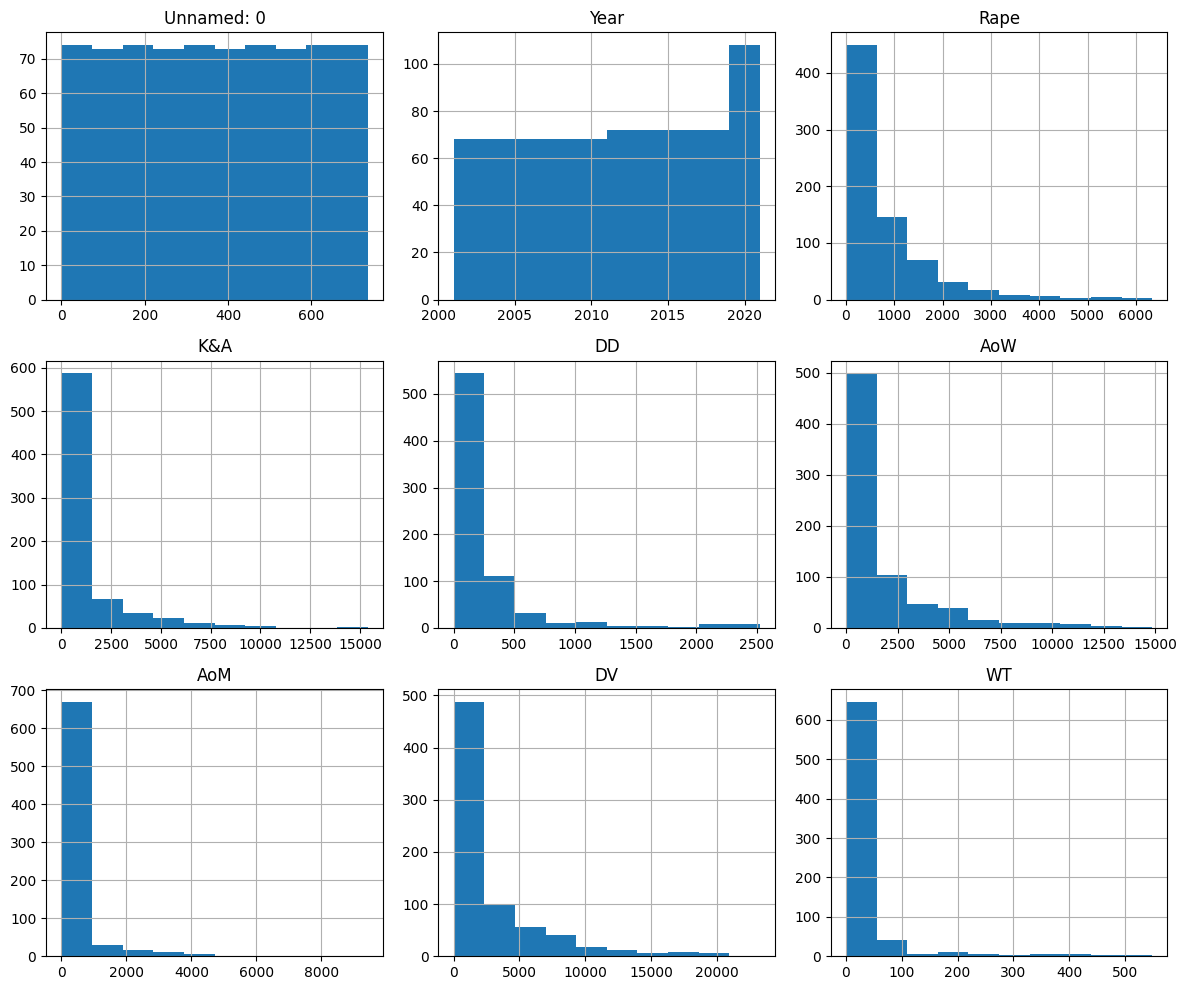

In [12]:
# 3. ANALISIS DISTRIBUSI DAN KORELASI - Distribusi Variable Numerik
#Plot histogram untuk distribusi variabel numerik
crimes_data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()




Matriks Korelasi:


,Unnamed: 0,Year,Rape,K&A,DD,AoW,AoM,DV,WT
Unnamed: 0,1.000000,0.998764,0.165283,0.301284,-0.003820,0.233518,-0.002738,0.159970,0.201995
Year,0.998764,1.000000,0.173887,0.304664,-0.000553,0.238821,0.004101,0.165201,0.208886
Rape,0.165283,0.173887,1.000000,0.700730,0.553497,0.804336,0.458025,0.680321,0.219218
K&A,0.301284,0.304664,0.700730,1.000000,0.691524,0.671159,0.355703,0.685999,0.179016
DD,-0.003820,-0.000553,0.553497,0.691524,1.000000,0.456012,0.422970,0.487465,0.093254
AoW,0.233518,0.238821,0.804336,0.671159,0.456012,1.000000,0.521432,0.631558,0.284338
AoM,-0.002738,0.004101,0.458025,0.355703,0.422970,0.521432,1.000000,0.419300,0.260077
DV,0.159970,0.165201,0.680321,0.685999,0.487465,0.631558,0.419300,1.000000,0.280839
WT,0.201995,0.208886,0.219218,0.179016,0.093254,0.284338,0.260077,0.280839,1.000000


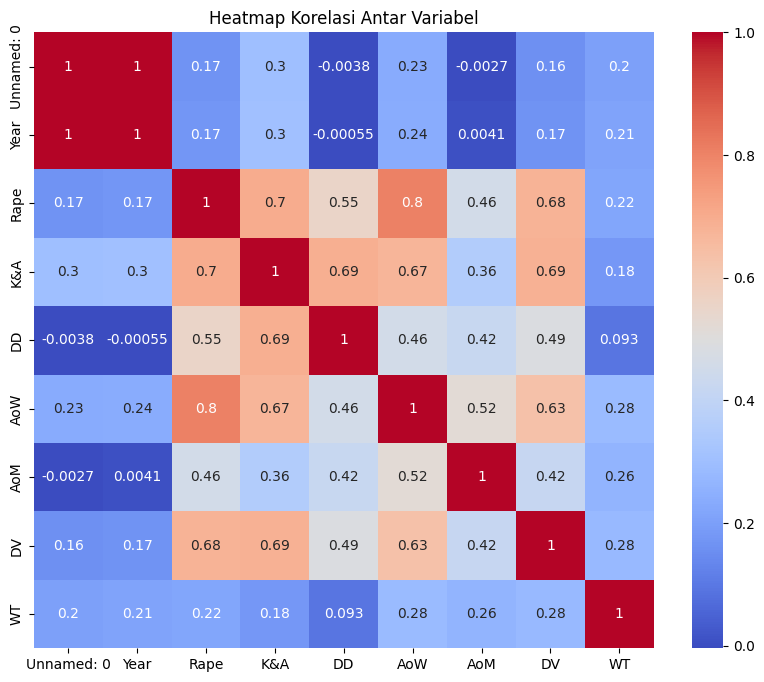

In [13]:
#3. ANALISIS DISTRIBUSI dan KORELASI - Korelasi antar VARIABLE

# Menampilkan matriks korelasi hanya untuk kolom numerik
print("Matriks Korelasi:")
correlation_matrix = crimes_data.select_dtypes(include=['float64', 'int64']).corr() #Menghitung korelasi hanya untuk kolom numerik
display(correlation_matrix)

# Plot heatmap korelasi
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()


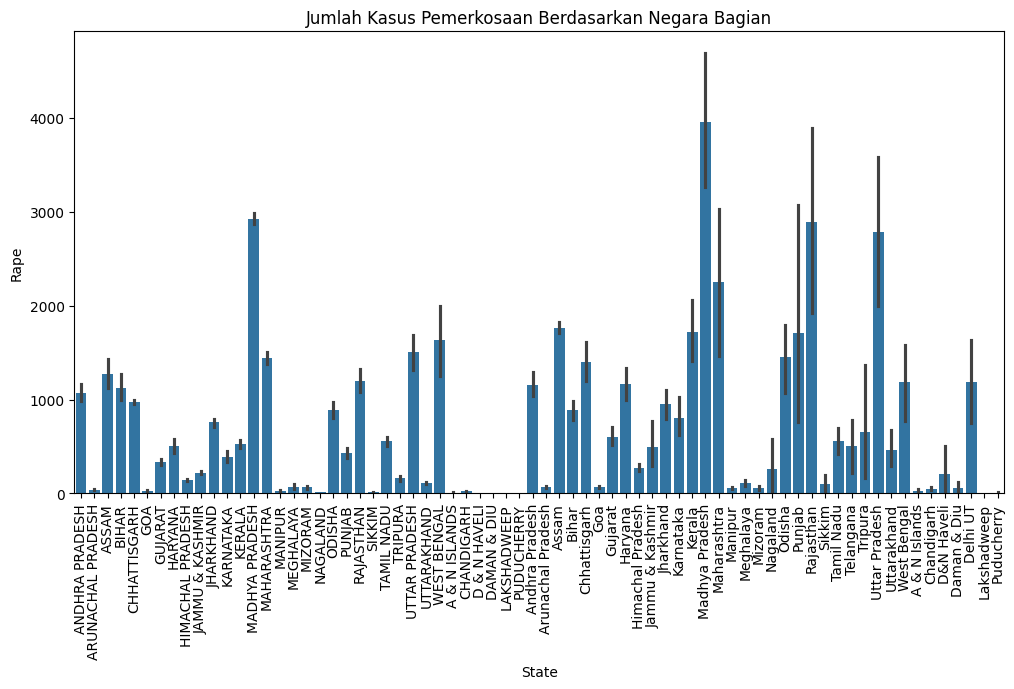

In [14]:
#4. Visualisasi Data

# Plot jumlah kasus pemerkosaan berdasarkan negara bagian (State)
plt.figure(figsize=(12, 6))
sns.barplot(data=crimes_data, x='State', y='Rape')
plt.xticks(rotation=90)
plt.title("Jumlah Kasus Pemerkosaan Berdasarkan Negara Bagian")
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [20]:
#1. Penyelesaian Menghapus atau Menangani Data Kosong (Missing Values)
#2. Penyelesaian Menghapus Data Duplikat

# 1. Memeriksa tipe data setiap kolom
print("Tipe data setiap kolom:")
print(crimes_data.dtypes)

# 2. Menggunakan Label Encoding pada kolom 'State' agar menjadi numerik
from sklearn.preprocessing import LabelEncoder

# Inisiasi label encoder
label_encoder = LabelEncoder()

# Mengubah kolom 'State' menjadi numerik
crimes_data['State'] = label_encoder.fit_transform(crimes_data['State'])

# 3. Memverifikasi hasil encoding
print("Beberapa baris pertama setelah encoding pada kolom 'State':")
print(crimes_data[['State']].head())


Tipe data setiap kolom:
Unnamed: 0    float64
State         float64
Year          float64
Rape          float64
K&A           float64
DD            float64
AoW           float64
AoM           float64
DV            float64
WT            float64
dtype: object
Beberapa baris pertama setelah encoding pada kolom 'State':
   State
0      2
1      3
2      4
3      8
4     11


In [21]:
#3. Normalisasi

from sklearn.preprocessing import MinMaxScaler

# Memilih kolom numerik saja, kecuali 'Year' jika tidak diperlukan untuk analisis selanjutnya
numerical_cols = crimes_data.select_dtypes(include=['float64', 'int64']).columns

# Normalisasi data numerik
scaler = MinMaxScaler()
crimes_data[numerical_cols] = scaler.fit_transform(crimes_data[numerical_cols])

# Verifikasi hasil normalisasi
print("Beberapa baris pertama setelah normalisasi:")
print(crimes_data.head())


Beberapa baris pertama setelah normalisasi:
   Unnamed: 0     State  Year      Rape       K&A        DD       AoW  \
0    0.000000  0.028986   0.0  0.137447  0.049737  0.166403  0.238605   
1    0.001361  0.043478   0.0  0.005208  0.003576  0.000000  0.005251   
2    0.002721  0.057971   0.0  0.128925  0.069566  0.023376  0.057227   
3    0.004082  0.115942   0.0  0.140129  0.033678  0.340333  0.037837   
4    0.005442  0.159420   0.0  0.151333  0.011118  0.027734  0.118697   

        AoM        DV        WT  
0  0.241032  0.248776  0.012750  
1  0.000318  0.000473  0.000000  
2  0.000425  0.053613  0.000000  
3  0.002229  0.066930  0.151184  
4  0.017088  0.036086  0.000000  


In [22]:
#4. Deteksi Penanganan Outlier
# Menghitung batas bawah dan atas menggunakan IQR
Q1 = crimes_data[numerical_cols].quantile(0.25)
Q3 = crimes_data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Menghapus outlier di luar batas IQR
crimes_data = crimes_data[~((crimes_data[numerical_cols] < (Q1 - 1.5 * IQR)) | (crimes_data[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Dataset setelah menghapus outlier:")
print(crimes_data.shape)


Dataset setelah menghapus outlier:
(507, 10)


In [24]:
#5.Encoding Data Kategorikal

from sklearn.preprocessing import LabelEncoder

# Encoding kolom State
label_encoder = LabelEncoder()
crimes_data['State'] = label_encoder.fit_transform(crimes_data['State'])


<ipython-input-24-5e918e345ff5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crimes_data['State'] = label_encoder.fit_transform(crimes_data['State'])


In [25]:
# Memeriksa data kosong setelah proses sebelumnya
print("Jumlah data kosong di setiap kolom setelah preprocessing:")
print(crimes_data.isnull().sum())


Jumlah data kosong di setiap kolom setelah preprocessing:
Unnamed: 0    0
State         0
Year          0
Rape          0
K&A           0
DD            0
AoW           0
AoM           0
DV            0
WT            0
dtype: int64


In [26]:
#6. BINNING

# Membuat bin untuk kolom Year
bins = [2000, 2005, 2010, 2015, 2020]
labels = ['2001-2005', '2006-2010', '2011-2015', '2016-2020']
crimes_data['Year_Binned'] = pd.cut(crimes_data['Year'], bins=bins, labels=labels, right=False)


<ipython-input-26-fc7b31cf18bc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crimes_data['Year_Binned'] = pd.cut(crimes_data['Year'], bins=bins, labels=labels, right=False)


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

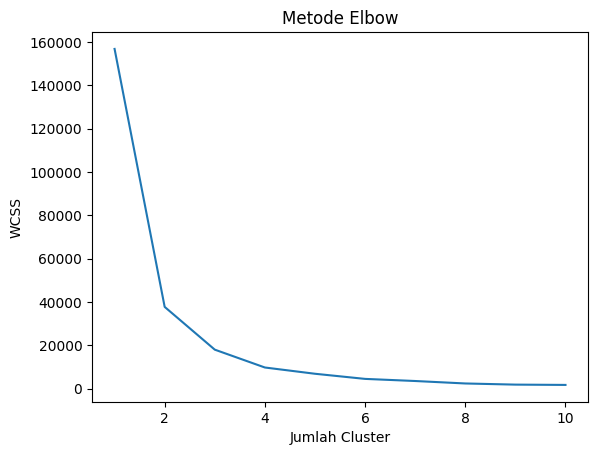

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Mencari jumlah cluster optimal dengan metode Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(crimes_data[numerical_cols])
    wcss.append(kmeans.inertia_)

# Plot WCSS untuk setiap jumlah cluster
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()


In [28]:
# Melakukan clustering dengan jumlah cluster yang dipilih, misalnya 3
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
crimes_data['Cluster'] = kmeans.fit_predict(crimes_data[numerical_cols])

# Menampilkan hasil clustering
print("Data dengan label cluster:")
print(crimes_data[['State', 'Cluster']].head())


Data dengan label cluster:
   State  Cluster
1      2        0
2      3        0
4      6        0
5     14        0
6     15        0


<ipython-input-28-042488480cc0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crimes_data['Cluster'] = kmeans.fit_predict(crimes_data[numerical_cols])


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [29]:
from sklearn.metrics import silhouette_score

# Menghitung Silhouette Score
score = silhouette_score(crimes_data[numerical_cols], crimes_data['Cluster'])
print("Silhouette Score:", score)


Silhouette Score: 0.5784722997332515


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [30]:
from sklearn.decomposition import PCA

# Menggunakan PCA untuk mereduksi data menjadi 2 komponen utama
pca = PCA(n_components=2)
pca_features = pca.fit_transform(crimes_data[numerical_cols])

# Menyimpan hasil PCA dalam dataframe
pca_df = pd.DataFrame(data=pca_features, columns=['PCA1', 'PCA2'])

# Menambahkan label cluster ke hasil PCA
pca_df['Cluster'] = crimes_data['Cluster']

# Menampilkan beberapa baris pertama hasil PCA
print("Data setelah Feature Selection dengan PCA:")
print(pca_df.head())


Data setelah Feature Selection dengan PCA:
        PCA1      PCA2  Cluster
0 -25.834837 -0.638484      NaN
1 -24.834835 -0.639459      0.0
2 -21.834831 -0.639989      0.0
3 -13.834839 -0.643948      NaN
4 -12.834793 -0.647306      0.0


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

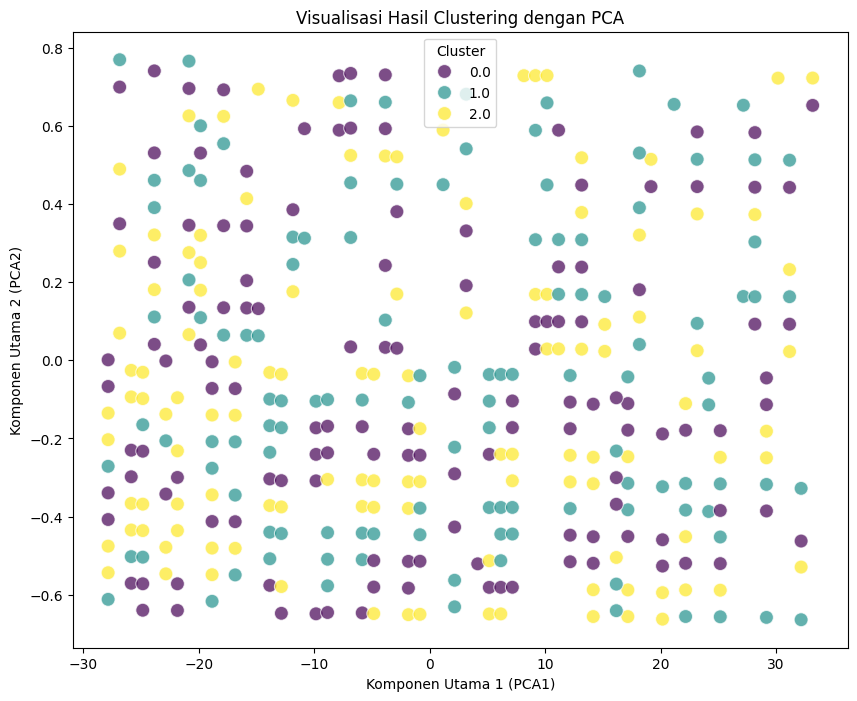

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot untuk hasil clustering
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis', s=100, alpha=0.7)
plt.title("Visualisasi Hasil Clustering dengan PCA")
plt.xlabel("Komponen Utama 1 (PCA1)")
plt.ylabel("Komponen Utama 2 (PCA2)")
plt.legend(title='Cluster')
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [33]:
# Memilih kolom numerik saja untuk menghitung rata-rata per cluster
numerical_cols = crimes_data.select_dtypes(include=['float64', 'int64']).columns

# Mengelompokkan data berdasarkan cluster dan menghitung rata-rata untuk kolom numerik
cluster_summary = crimes_data.groupby('Cluster')[numerical_cols].mean()

print("Rata-rata fitur pada setiap cluster:")
print(cluster_summary)


Rata-rata fitur pada setiap cluster:
         Unnamed: 0      State      Year      Rape       K&A        DD  \
Cluster                                                                  
0          0.463953   8.377778  0.470278  0.046970  0.023186  0.012588   
1          0.472623  48.591463  0.469512  0.046146  0.021165  0.034423   
2          0.459054  28.435583  0.467485  0.051613  0.019603  0.022853   

              AoW       AoM        DV       WT  
Cluster                                         
0        0.026136  0.006930  0.031254  0.00422  
1        0.036208  0.006305  0.039241  0.00371  
2        0.048220  0.009434  0.032221  0.00457  


1. Cluster 0 menunjukkan wilayah dengan insiden kejahatan yang lebih tinggi, sehingga diperlukan alokasi sumber daya yang lebih besar untuk pengendalian kejahatan.

2. Cluster 1 merupakan cluster dengan tingkat kasus yang rendah, sehingga intervensi khusus mungkin tidak dibutuhkan.

3. Cluster 2 menunjukkan fokus permasalahan pada kekerasan terhadap perempuan, yang bisa menjadi fokus program pencegahan dan pendidikan untuk mengurangi insiden ini.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [35]:
# Mengekspor data dengan label cluster ke dalam file CSV


output_file = "hasil_clustering.csv"
crimes_data.to_csv(output_file, index=False)

print(f"Hasil clustering telah disimpan ke dalam file: {output_file}")


Hasil clustering telah disimpan ke dalam file: hasil_clustering.csv
